In [1]:
def read_data_from_excel(file_path = r'C:\Users\DELL\Desktop\Train_rev1.csv'):
    '''
    reads raw data from an execl file and stores it in a dxn list
    where n is the number of data examples and d is the number
    of categories

    input: file name of where to read data from

    output:nxd list of extracted raw data

    '''

    assert isinstance(file_path, str)

    print ("Reading data...")

    with open(file_path, encoding = 'utf8') as data:
        data_csv = csv.reader(data)

        header = data.readline().split(',')
        #these are the categories
        # ['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw', 'SalaryNormalized', 'SourceName\r\n']
        
        i=0
        for name in header:
            headers[name] = i
            i+=1

        lines = [x for x in data_csv]

        for l in lines:
            features.append(l[0:9]+[l[11]])
            salaries.append(float(l[10]))
    print ("Done!")

    #Can access each feature by name instead of number using below syntax
    #print features[0][categories['Id']]


def visualize_salary_data(x_values, y_values, data):
    '''
    Makes a chart and visualizes the salary data that is passed to it


    :param x_values:
    :param y_values:
    :param data:
    :return:
    '''
    pass

def salary_per_category(category_name):
    '''
    Gets average salary data and max salary data for desired catergory_name
    input: the category name you wish to see salary data for ex: location, company, job title, etc.
    output: average_category_salary - dictonary that stores the average salary data per category values
            max_category_salary - dictonary that stores the max salary data per category values
    '''

    from collections import defaultdict
    import operator

    assert isinstance(category_name, str)
    assert category_name in headers

    category_salaries = defaultdict(list)
    average_category_salaries = {}
    max_category_salary = {}
    top_20 = {}

    #create dictonary of lists that stores all the salary values for each category value
    for i in range(len(salaries)):
        category_salaries[features[i][headers[category_name]]].append(salaries[i])
    
    sorted_category_salaries = sorted(category_salaries.items(), key=lambda x: len(x[1]), reverse=True)

    #print number of listings in each category for top 20
    for i in range(20):
        top_20[sorted_category_salaries[i][0]] = len(sorted_category_salaries[i][1])
        #print sorted_category_salaries[i][0], len(sorted_category_salaries[i][1])

    #Calculate average and max salary for each category value
    for key in category_salaries.keys():
        #print key, len(category_salaries[key])
        if len(category_salaries[key]) > 4:
            average_category_salaries[key] = sum(category_salaries[key])/len(category_salaries[key])
        max_category_salary[key] = max(category_salaries[key])

    #print average_category_salaries
    #print max_category_salary

    sorted_average_category_salaries = sorted(average_category_salaries.items(), key=lambda x: x[1])
    sorted_max_category_salaries = sorted(max_category_salary.items(), key=lambda x: x[1])

   # print ("sorted_average_category_salaries",sorted_average_category_salaries[-5:])
    #print ('sorted_max_category_salaries',sorted_max_category_salaries[-5:])

    #all categories in dataset
    #print category_salaries.keys()

    #print (top_20)
    return average_category_salaries, max_category_salary, top_20, category_salaries


In [2]:
def generate_top_10_Company_per_Category(data):  
    '''
    
    
    '''
    
    import pandas as pd
    import operator
    assert type(data) == type(pd.DataFrame(np.arange(12).reshape((3,4))))
    
    
    Company_salary = data[['Company','Category','SalaryNormalized']]
    IT = Company_salary.loc[Company_salary['Category'] == 'IT Jobs']
    Account = Company_salary.loc[Company_salary['Category'] == 'Accounting & Finance Jobs']
    Engineering = Company_salary.loc[Company_salary['Category'] == 'Engineering Jobs']
    
    Top3 = [IT,Engineering,Account]

    temp = {}
    Top10 = []
    for i in Top3:
        for j in set(i['Company']):
            temp[j] =  i.loc[i['Company'] == j]['SalaryNormalized'].mean()
        sorted_temp = sorted(temp.items(), key=operator.itemgetter(1),reverse = True)
        Top10.append(sorted_temp[1:11])
        temp = {}
        
    return Top10

In [3]:
def job_titles_plots(file_path = r'C:\Users\DELL\Desktop\Train_rev1.csv'):
    '''
    Reads raw data from an execl file.
    This function create three figures, the frequency of job salary,
    number of terms in job titles and the wordcloud.
        
    
    '''
    assert isinstance(file_path, str)

    
    ###### figure 1. Frequency of job salary #####
    data = pd.read_csv(file_path)
    data.SalaryNormalized.hist(figsize = (12,6)); plt.ylabel('frequency'); plt.xlabel(u'salary (£)'); plt.yscale('log')
    plt.title('Frequency of Salary')
    
    
    
    ###### figure 2. Number of terms in job titles #####
    #generate a single str and get rid of 0-9, a-z, A-Z, NaN.......
    text = ' '.join(data['Title'].replace(r'[^0-9a-zA-Z]+',' ',regex=True).fillna('').str.lower())
    stop_words = ['k','c','in','to','it','and','of',''] #redundant words 
    most_common_terms = Counter([w for w in text.split(' ') if w not in stop_words]).most_common(50)
    
    
    

    labels, values = zip(*most_common_terms)
    print(values[0]/sum(values))
    indexes = np.arange(len(labels))
    width = 0.5
    my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)] #choose RGB values for different color


    plt.figure(figsize=(15,10))
    plt.bar(indexes, values, width,color = my_colors)
    plt.xticks(indexes, labels, rotation= 'vertical')
    plt.xlabel("Term of Titles");plt.ylabel("Number of terms");plt.title('Words Frequency in Job Title')
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=22)
    plt.rc('legend', fontsize=30)    # legend fontsize
    plt.show()
    
    
    

    ###### figure 3. Wordcloud #####    
    wordcloud = WordCloud(width=800, height=400,max_font_size=80, relative_scaling=0.5,collocations=False).generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")



In [4]:
def boxplot(top_20, category_salaries):
    '''
    This function plots boxplt for the top_10 catagories
    
    '''
    
    
    x_data = ['IT', 'Engineering', 'Accounting & Finance', 'Healthcare & Nursing', 'Sales', 'Other/General',
              'Teaching', 'Hospitality & Catering', 'Advertising & Marketing', 'Trade & Construction'
             ]

    colors =  ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
               'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)', 'rgba(107,174,214, 0.5)', 'rgba(10, 140, 208, 0.5)', 
               'rgba(230, 230, 0, 0.5)','rgba(0, 153, 51, 0.5)'
              ]
    
    y, traces = [], []
    for i in top_20.keys():
        y.append(np.array(category_salaries[i]))

    for xd, yd, cls in zip(x_data, y[0:10], colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                showlegend =True,
                boxpoints=False,
                #labelsize=22,
                jitter=0.1,
                whiskerwidth=0.4,
                fillcolor=cls,
                marker=dict(
                    size=5,
                ),
                line=dict(width=1,
                          color=cls
                         ),
            )
                         )

    layout = go.Layout(
        #legend = list(font = list(size(30))),
        title='Salary Distribution of Top 10 Job Categories',
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=25000,
            gridcolor='rgb(255, 255, 255)',
            gridwidth=1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
         xaxis=dict( tickangle=90,linewidth = 1 , tickwidth= 2
             ),
        margin=dict(
            l=60,
            r=110,
            b=160,
            t=50,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        showlegend=True
    )

    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.plot(fig)

In [5]:
def Top3_line_chart(Top10):
    '''
    
    '''
    Top10_S = []
    for i in Top10:
        Top10_S.append([j[1] for j in i])
    

    x = ['Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10']

    trace1 = go.Scatter(
        x=x,
        y=Top10_S[0],
        mode='lines+markers',
        name="IT Jobs",
        hoverinfo='name',
        line=dict(
            shape='spline'
        )
    )
    trace2 = go.Scatter(
        x=x,
        y=Top10_S[1],
        mode='lines+markers',
        name="Accounting & Finance Jobs",
        hoverinfo='name',
        line=dict(
            shape='spline'
        )
    )
    trace3 = go.Scatter(
        x=x,
        y=Top10_S[2],
        mode='lines+markers',
        name="Engineering Jobs",
        hoverinfo='name',
        line=dict(
            shape='spline'
        )
    )
    Top3_data = [trace1, trace2, trace3]
    layout = dict(title = 'The 10 Highest Average Salary Companies per Catagory',
                  xaxis = dict(title = 'Top 10'),
                  yaxis = dict(title = 'Average Salary'),
        legend=dict(
            y=0.5,
            traceorder='reversed',
            font=dict(
                size=16
            )
        )
    )
    fig = dict(data=Top3_data, layout=layout)
    plotly.offline.plot(fig)


In [6]:
####### MAIN LOOP ########
import shlex
import csv
import numpy as np
import plotly
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from plotly.offline import *
from pyecharts import Pie,configure # need to be installed
from wordcloud import WordCloud # need to be installed first

data = pd.read_csv(r'C:\Users\DELL\Desktop\Train_rev1.csv')
display(data.head())
display(data.describe())

features, salaries=[], []
headers = {}

read_data_from_excel()
avg_salary_dict, max_salary_dict, top_20, category_salaries = salary_per_category('Category')
Top10 = generate_top_10_Company_per_Category(data)

values = list(top_20.values())
labels = list(top_20.keys())


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


,Id,SalaryNormalized
count,2.447680e+05,244768.000000
mean,6.970142e+07,34122.577576
std,3.129813e+06,17640.543124
min,1.261263e+07,5000.000000
25%,6.869550e+07,21500.000000
50%,6.993700e+07,30000.000000
75%,7.162606e+07,42500.000000
max,7.270524e+07,200000.000000


Reading data...
Done!


0.1407436295992862


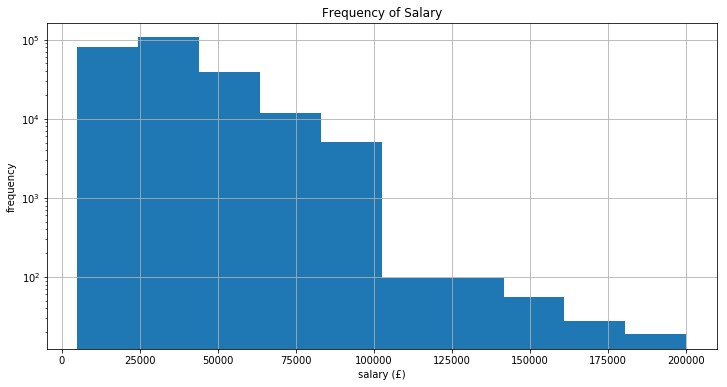

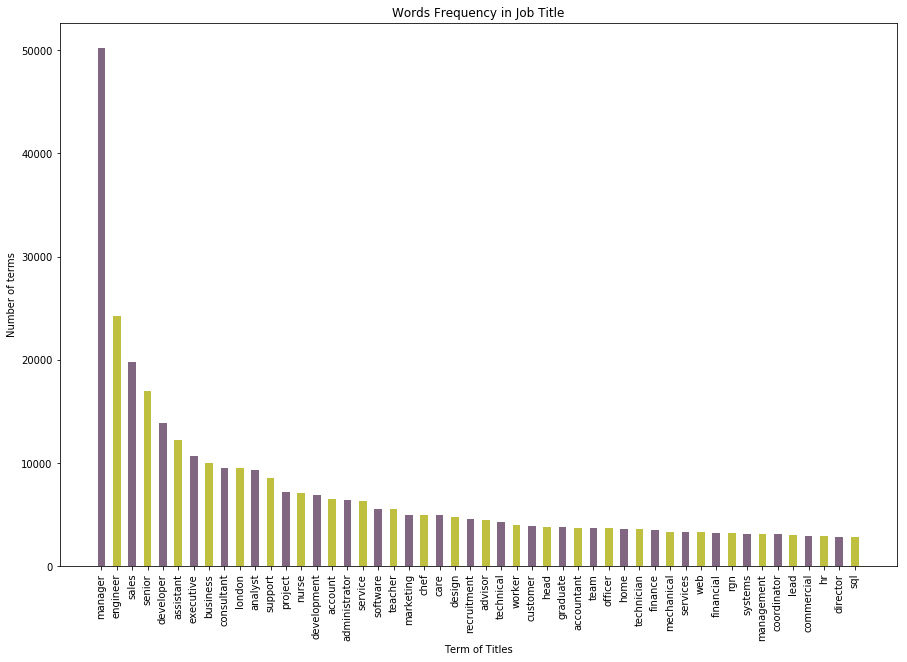

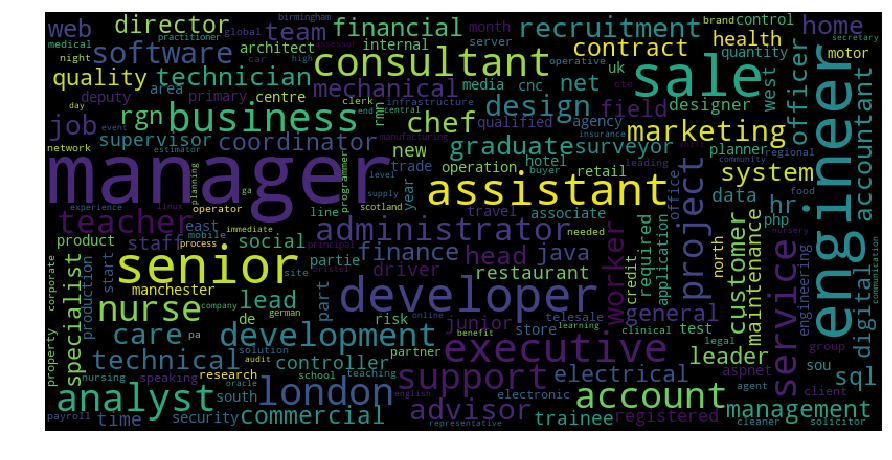

In [7]:
job_titles_plots()

In [8]:
boxplot(top_20, category_salaries)

In [9]:
Top3_line_chart(Top10)

In [10]:
configure(output_image=True)
pie =Pie('Percentage of Top 20 Job Category',background_color = 'white',title_pos='center')
pie.add('radius', labels, values, center = [50, 50], radius=[30, 75], rosetype='radius',
        is_legend_show = False, is_label_show = True
       )
pie